In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(100)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([5, 8, 6, ..., 7, 9, 2], dtype=int64)

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    
    W2 = np.random.rand(15, 10) - 0.5
    b2 = np.random.rand(15, 1) - 0.5
    
    W3 = np.random.rand(12,15) - 0.5
    b3 = np.random.rand(12, 1) - 0.5
    
    W4 = np.random.rand(10,12) - 0.5
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [9]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [10]:
def ReLU_deriv(Z):
    return Z > 0


In [11]:
def sigmoid(x):
  
    return 1 / (1 + np.exp(-x))

In [12]:
def tanh(x):
   
    return np.tanh(x)

In [13]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [14]:
def tanh_derivative(x):
    return 1 - tanh(x)**2

In [15]:
def forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = tanh(Z3)
    
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3,A3,Z4,A4

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [17]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)
    
    dZ3 = W4.T.dot(dZ4) * tanh_derivative(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * sigmoid_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    
    
    
    return dW1, db1, dW2, db2, dW3, db3, dW4,db4

In [18]:

def update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    
    W4 = W4 - alpha * dW4  
    b4 = b4 - alpha * db4 
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [20]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [21]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()
      
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[7 1 7 ... 0 1 7] [5 8 6 ... 7 9 2]
0.03504878048780488
Iteration:  10
[7 1 1 ... 4 1 7] [5 8 6 ... 7 9 2]
0.08029268292682927
Iteration:  20
[7 1 1 ... 4 7 7] [5 8 6 ... 7 9 2]
0.12024390243902439
Iteration:  30
[7 1 1 ... 4 7 7] [5 8 6 ... 7 9 2]
0.162
Iteration:  40
[7 1 1 ... 1 7 7] [5 8 6 ... 7 9 2]
0.21426829268292683
Iteration:  50
[7 1 1 ... 1 7 7] [5 8 6 ... 7 9 2]
0.25346341463414634
Iteration:  60
[7 1 1 ... 1 7 6] [5 8 6 ... 7 9 2]
0.2776829268292683
Iteration:  70
[7 3 1 ... 1 7 6] [5 8 6 ... 7 9 2]
0.29617073170731706
Iteration:  80
[6 3 1 ... 1 7 6] [5 8 6 ... 7 9 2]
0.3106341463414634
Iteration:  90
[6 3 1 ... 1 0 6] [5 8 6 ... 7 9 2]
0.3231707317073171
Iteration:  100
[6 3 1 ... 1 0 6] [5 8 6 ... 7 9 2]
0.33678048780487807
Iteration:  110
[6 3 1 ... 1 0 6] [5 8 6 ... 7 9 2]
0.3514390243902439
Iteration:  120
[6 7 1 ... 1 0 6] [5 8 6 ... 7 9 2]
0.3671463414634146
Iteration:  130
[6 7 2 ... 1 0 2] [5 8 6 ... 7 9 2]
0.382
Iteration:  140
[6 7 2 ... 7 7 2] [5

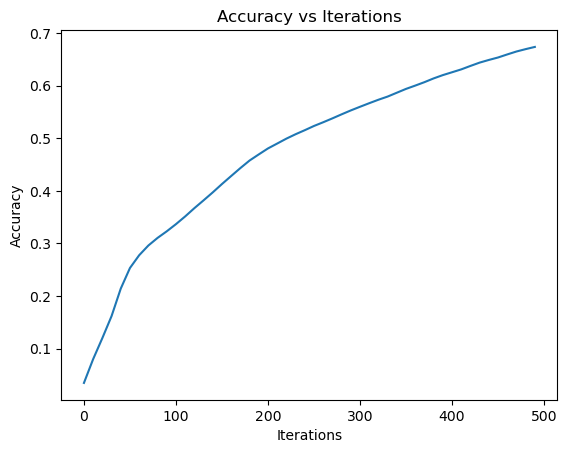

In [22]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

In [23]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


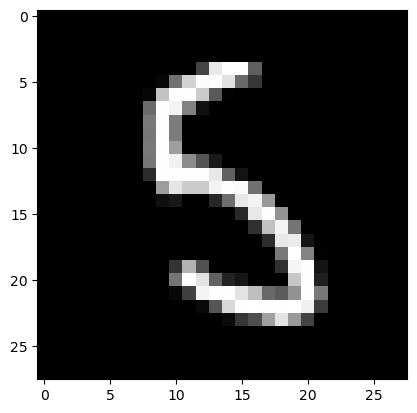

Prediction:  [3]
Label:  8


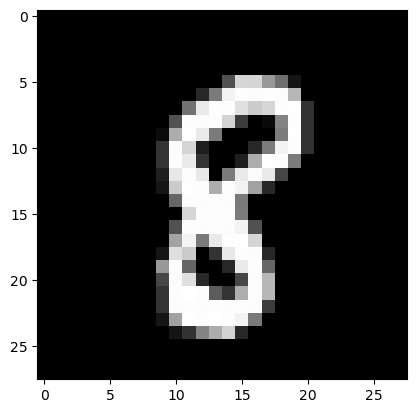

Prediction:  [6]
Label:  6


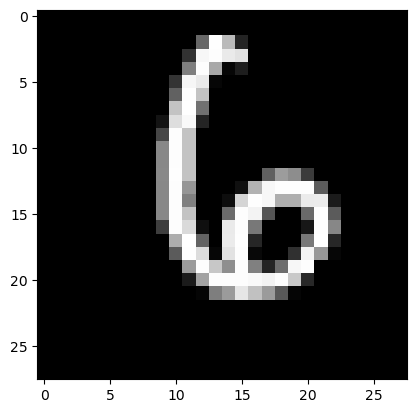

Prediction:  [1]
Label:  1


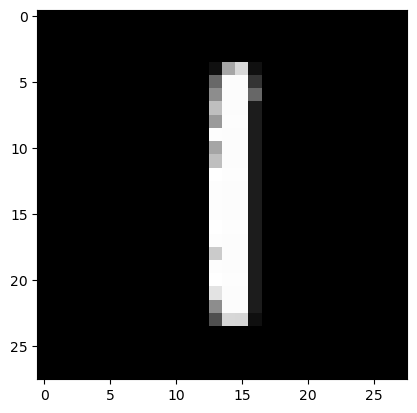

In [24]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(dev_predictions, Y_dev)

[5 0 2 7 7 9 4 5 5 3 3 9 2 7 1 7 4 7 4 8 1 3 9 1 3 9 5 9 8 4 9 0 7 7 9 4 0
 1 5 0 3 5 7 3 4 4 0 4 9 2 6 4 3 9 4 1 5 1 9 4 5 2 1 1 8 9 9 6 0 6 6 0 8 8
 7 9 2 9 4 0 8 9 7 5 8 0 6 6 1 6 0 3 9 7 6 6 0 5 9 1 5 3 3 2 8 7 7 5 3 0 5
 1 3 5 0 3 1 7 6 0 4 5 4 9 1 8 9 6 1 9 9 7 0 3 8 9 0 3 3 3 2 0 5 2 9 0 4 6
 9 4 1 1 9 6 9 1 8 2 7 1 1 9 4 5 1 4 4 6 7 4 7 4 3 3 0 6 7 5 4 9 6 0 4 7 2
 0 4 0 6 8 4 3 5 6 8 6 8 7 7 1 1 4 1 6 2 7 9 2 1 2 7 8 3 0 9 3 9 2 7 7 8 5
 0 7 3 7 2 1 1 1 0 1 9 7 4 2 3 8 3 0 6 2 2 3 3 1 1 3 1 2 0 3 6 2 3 4 6 6 8
 5 8 3 7 3 1 0 1 3 4 1 8 7 5 3 7 0 2 2 3 3 7 2 1 4 8 8 6 7 2 4 1 6 5 0 4 7
 2 1 7 3 4 6 9 6 0 1 6 7 0 6 1 2 2 4 6 9 0 1 6 0 1 3 9 1 4 1 3 4 5 9 7 4 5
 2 7 2 3 0 1 1 2 0 4 1 8 7 1 1 9 8 2 0 1 1 9 9 1 5 0 7 0 4 0 2 8 3 4 5 0 4
 3 3 3 5 0 5 7 3 3 8 6 3 0 3 8 8 9 4 9 3 8 0 5 8 9 7 6 7 7 2 6 6 6 2 7 8 3
 6 3 0 6 9 3 2 0 9 9 4 9 7 1 8 6 6 0 1 0 2 0 6 1 5 1 0 7 2 3 2 2 7 4 6 3 7
 5 7 8 7 5 7 9 7 2 1 0 4 8 9 3 2 5 1 0 3 7 8 9 4 7 6 3 6 2 3 4 0 6 1 7 9 6
 9 5 4 0 6 2 1 9 1 6 0 1 

0.677